In [101]:
%pip install numpy scikit-learn matplotlib

  Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.60.1-cp313-cp313-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl.metadata (112 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 44.7 MB/s  0:00:00 eta 0:00:01
Using cached contourpy-1.3.3-cp313-cp313-manylinux_2_27_x86_64.manylinux_2_28_x86_64.whl (362 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.60.1-cp313-cp313-manylinux1_x86_64.manylinux2014_x86_64.manylinux_2_17_x86_64.manylinux_2_5_x86_64.whl (4.9 MB)
Using cached kiwisolver-1.4.9-cp313-cp313-manylinux2014_x86_64.manylinux_2_17_x86_64.whl (1.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

### Vectorización de texto y modelo de clasificación Naïve Bayes con el dataset 20 newsgroups

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import f1_score

# 20newsgroups por ser un dataset clásico de NLP ya viene incluido y formateado
# en sklearn
from sklearn.datasets import fetch_20newsgroups
import numpy as np

## Carga de datos

In [3]:
# cargamos los datos (ya separados de forma predeterminada en train y test)
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'))
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'))

## Vectorización

In [4]:
# instanciamos un vectorizador
# ver diferentes parámetros de instanciación en la documentación de sklearn https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
tfidfvect = TfidfVectorizer()

In [7]:
# en el atributo `data` accedemos al texto
print(newsgroups_train.data[0])

I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.


In [8]:
# con la interfaz habitual de sklearn podemos fitear el vectorizador
# (obtener el vocabulario y calcular el vector IDF)
# y transformar directamente los datos
X_train = tfidfvect.fit_transform(newsgroups_train.data)
# `X_train` la podemos denominar como la matriz documento-término

In [13]:
# recordar que las vectorizaciones por conteos son esparsas
# por ello sklearn convenientemente devuelve los vectores de documentos
# como matrices esparsas
print(type(X_train))
print(f'shape: {X_train.shape}')
print(f'Cantidad de documentos: {X_train.shape[0]}')
print(f'Tamaño del vocabulario (dimensionalidad de los vectores): {X_train.shape[1]}')

<class 'scipy.sparse._csr.csr_matrix'>
shape: (11314, 101631)
Cantidad de documentos: 11314
Tamaño del vocabulario (dimensionalidad de los vectores): 101631


In [20]:
# una vez fiteado el vectorizador, podemos acceder a atributos como el vocabulario
# aprendido. Es un diccionario que va de términos a índices.
# El índice es la posición en el vector de documento.
tfidfvect.vocabulary_['car']

25775

In [21]:
# es muy útil tener el diccionario opuesto que va de índices a términos
idx2word = {v: k for k,v in tfidfvect.vocabulary_.items()}

In [25]:
# en `y_train` guardamos los targets que son enteros
y_train = newsgroups_train.target
y_train[:10]

array([ 7,  4,  4,  1, 14, 16, 13,  3,  2,  4])

In [26]:
# hay 20 clases correspondientes a los 20 grupos de noticias
print(f'clases {np.unique(newsgroups_test.target)}')
newsgroups_test.target_names

clases [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

## Similaridad de documentos

In [43]:
# Veamos similaridad de documentos. Tomemos algún documento
idx = 23
print(newsgroups_train.data[idx])





The control box of the Window itself (upper left corner of the window, single
click, am I being too simplistic?) has a font option. The 8 X 12 is about the
biggest one I can use without the characters turning funky. 


In [44]:
newsgroups_test.target_names[newsgroups_train.target[idx]]


'comp.os.ms-windows.misc'

In [45]:
# midamos la similaridad coseno con todos los documentos de train
cossim = cosine_similarity(X_train[idx], X_train)[0]

In [46]:
# podemos ver los valores de similaridad ordenados de mayor a menos
np.sort(cossim)[::-1]

array([1.        , 0.30321532, 0.284785  , ..., 0.        , 0.        ,
       0.        ], shape=(11314,))

In [47]:
# y a qué documentos corresponden
np.argsort(cossim)[::-1]

array([  23, 2851, 5558, ..., 4828, 4829,  827], shape=(11314,))

In [48]:
# los 5 documentos más similares:
mostsim = np.argsort(cossim)[::-1][1:6]

In [49]:
# el documento original pertenece a la clase:
newsgroups_train.target_names[y_train[idx]]

'comp.os.ms-windows.misc'

In [50]:
# y los 5 más similares son de las clases:
for i in mostsim:
  print(newsgroups_train.target_names[y_train[i]])

comp.windows.x
comp.windows.x
comp.windows.x
comp.windows.x
comp.windows.x


### Modelo de clasificación Naïve Bayes

In [51]:
# es muy fácil instanciar un modelo de clasificación Naïve Bayes y entrenarlo con sklearn
clf = MultinomialNB()
clf.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [52]:
# con nuestro vectorizador ya fiteado en train, vectorizamos los textos
# del conjunto de test
X_test = tfidfvect.transform(newsgroups_test.data)
y_test = newsgroups_test.target
y_pred =  clf.predict(X_test)

In [53]:
# el F1-score es una metrica adecuada para reportar desempeño de modelos de claificación
# es robusta al desbalance de clases. El promediado 'macro' es el promedio de los
# F1-score de cada clase. El promedio 'micro' es equivalente a la accuracy que no
# es una buena métrica cuando los datasets son desbalanceados
f1_score(y_test, y_pred, average='macro')

0.5854345727938506

### Consigna del desafío 1

**Cada experimento realizado debe estar acompañado de una explicación o interpretación de lo observado.**

**1**. Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.
Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido
la similaridad según el contenido del texto y la etiqueta de clasificación.

**2**. Construir un modelo de clasificación por prototipos (tipo zero-shot). Clasificar los documentos de un conjunto de test comparando cada uno con todos los de entrenamiento y asignar la clase al label del documento del conjunto de entrenamiento con mayor similaridad.

**3**. Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación
(f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros
de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial
y ComplementNB.

**NO cambiar el hiperparámetro ngram_range de los vectorizadores**.

**4**. Transponer la matriz documento-término. De esa manera se obtiene una matriz
término-documento que puede ser interpretada como una colección de vectorización de palabras.
Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares.

**Elegir las palabras MANUALMENTE para evitar la aparición de términos poco interpretables**.


---
## Punto 1

**1**. Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.
Estudiar los 5 documentos más similares de cada uno analizar si tiene sentido
la similaridad según el contenido del texto y la etiqueta de clasificación.

In [ ]:
import random

# 1. Vectorizar documentos. Tomar 5 documentos al azar y medir similaridad con el resto de los documentos.

X_test = tfidfvect.transform(newsgroups_test.data)

# Tomar 5 indices de documentos al azar
random_indices = random.sample(range(X_test.shape[0]), 5)

for idx in random_indices:
    print(f"\nDocumento índice {idx}:\n")
    print(newsgroups_test.data[idx])
    print(f"\nClase del documento: {newsgroups_test.target_names[y_test[idx]]}\n")

    # Medir similaridad coseno con todos los documentos de train
    cossim = cosine_similarity(X_test[idx], X_train)[0]

    # Obtener los 5 documentos más similares, agregar scores
    mostsim = np.argsort(cossim)[::-1][1:6]

    print("Los 5 documentos más similares son de las clases:\n")
    for i in mostsim:
        print(
            newsgroups_train.target_names[y_train[i]], f"(similaridad: {cossim[i]:.4f})"
        )



Documento índice 4101:


What is "doing it right the first time"?  Murdered them all?  Used tanks? 
Maybe they should have had enough evidence to indict.  From the list presented
to date, I haven't seen ANYTHING illegal.  They claim that the BD's bought
components to convert their weapons to Class III devices, but no evidence that
they had done so.  In fact, with a Class III FFL living with them, this may
have been legal (given recent court rulings).

What you really meant to say was that the ATF should have done the right and
lwaful thing.  Or did you just want the BD's dead?

Clase del documento: talk.politics.guns

Los 5 documentos más similares son de las clases:

talk.politics.guns (similaridad: 0.2730)
talk.politics.mideast (similaridad: 0.2624)
talk.politics.mideast (similaridad: 0.2609)
talk.politics.guns (similaridad: 0.2602)
talk.politics.mideast (similaridad: 0.2595)

Documento índice 1504:





The April 1993 edition of MIX Magazine carries a story on 3DO which
includes pi

En el primer texto, se mencionan palabras claras relacionadas principalmente a las armas y guerra. Entre ellas tenemos dos principales "tanks", "weapons". Luego "Class III FFL", que personalmente no se que es pero puede estar relacionado con armas de destruccion masiva. Finalmente se tiene algunas referencias a la legalidad de ciertas acciones y pocesiones, como asi tambien algunos acronimos que podrian estar relacionados con un nombre de un personaje politico o presidente. Entonces dadas todas estas palabras, la primer asociacion seria un target relacionado a las armas "guns" y luego junto con las palabras mas cercanas a la politicas de legalidad, evidencia, "court rulings" y suposiciones/opinion respecto a una decision, apuntan a un topico mas politico. 
Al hacer la similutd de coseno del este documento con el resto de los documentos (excluido el mismo) se encontro primero con mayor score el target "talk.politics.guns" lo cual es correcto y tiene mucho sentido en base a lo que descripto anteriormente. Pero si seguimos observando los siguientes documentos mas similares, aparece reiteradas veces el target "talk.politics.mideast", lo cual es totalmente coherente, sobre todo por la hipotesis de que "Class III FFL" se refiere a armas de destruccion masiva, lo cual esta directamente relacionado desde el punto de vista de USA con la guerra en medio oriente.

What is "doing it right the first time"?  **Murdered** them all?  Used tanks? 
Maybe they should have had enough evidence to indict.  From the list presented
to date, I haven't seen ANYTHING illegal.  They claim that the BD's bought
components to convert their weapons to Class III devices, but no evidence that
they had done so.  In fact, with a Class III FFL living with them, this may
have been legal (given recent court rulings).

What you really meant to say was that the ATF should have done the right and
lwaful thing.  Or did you just want the BD's dead?

Clase del documento: talk.politics.guns

Los 5 documentos más similares son de las clases:

talk.politics.guns (similaridad: 0.2730)
talk.politics.mideast (similaridad: 0.2624)
talk.politics.mideast (similaridad: 0.2609)

---
## Punto 2

**2**. Construir un modelo de clasificación por prototipos (tipo zero-shot). Clasificar los documentos de un conjunto de test comparando cada uno con todos los de entrenamiento y asignar la clase al label del documento del conjunto de entrenamiento con mayor similaridad.

In [ ]:
# De base es el punto 1 del desafío pero ahora usando todos los documentos de test y tomando la clase del documento más similar. Esto sirve para tener un baseline sencillo de clasificación por similaridad.
y_pred_sim = []

# midamos la similaridad  con todos los documentos de train, lo hacemos matricialmente para mayor eficiencia y rapidez, no documento por documento
cossim = cosine_similarity(X_test, X_train)
# obtenemos los indices de los documentos más similares en el dataset de training (no va haber compracion consigo mismo). argsort ordena de menor a mayor, por eso invertimos el orden con ::-1 
most_similar_idx = np.argsort(cossim, axis=1)[:, ::-1][:, 0]
# obtenemos las predicciones basadas en la clase del documento más similar
y_pred_sim = y_train[most_similar_idx]
# calculamos el f1-score
f1_score(y_test, y_pred_sim, average='macro')

0.5036472862947965

In [67]:
most_similar_idx
y_pred_sim

array([ 0, 19, 17, ..., 17, 12, 15], shape=(7532,))

Este punto es el base o baseline para poder tener una metrica de referencia con la cual poder comprarar los subsiguientes algortimos o tecnicas que se apliquen a la clasificacion. Es basicamente un algoritmo de K vecinos proximos con K = 1 usando de metrica de distacnias, la simulitud del coseno. 
Respecto al score se observa que comparado con el F1 score de la inferencia usando NB de base de skilearn, se menor. Lo cual tiene sentido, dado que una primera aproximacion a la clasificacion muy simple, pero que a pesar de ellos, su metrica F1 0.50 no es para nada mala dado la simplicidad del modelo. Aunque por otro lado esto podria ser circuntacial y muy dependiente del dataset en si mismo y la conformacion de las particiones del mismo. Si se tienen clases lo sufiecientemente distintas y seperables que a la hora de la verctorizacion los vectores de cada documento esten claramente distanciados en el espacio vectorial, entonces este tipo de algoritmo funcionara bien, en casos de abiguedades seguramente tiende a bajar la metrica F1.

---
## Punto 3

**3**. Entrenar modelos de clasificación Naïve Bayes para maximizar el desempeño de clasificación
(f1-score macro) en el conjunto de datos de test. Considerar cambiar parámteros
de instanciación del vectorizador y los modelos y probar modelos de Naïve Bayes Multinomial
y ComplementNB.

In [88]:
base_score = 0.5036472862947965

In [96]:
countvect = CountVectorizer()
X_train_count = countvect.fit_transform(newsgroups_train.data)
X_test_count = countvect.transform(newsgroups_test.data)
y_train = newsgroups_train.target

In [97]:
# Experimento 1: Cambiar el vectorizador TF-IDF por un CountVectorizer
# instanciamos un vectorizador CountVectorizer


clf = MultinomialNB()
clf.fit(X_train, y_train)
y_pred_count =  clf.predict(X_test_count)
score = f1_score(y_test, y_pred_count, average='macro')

improvement = (score - base_score) / base_score * 100
print(f"F1-score: {score}, Improvement: {improvement:.2f}%")

# Una metrica mala, dado que es peor incluso que el baseline de similaridad coseno. 
# Esto puede deberse a que el modelo NB se beneficia de la ponderacion TF-IDF para mejorar la representacion de los documentos y por ende la clasificacion. 
# Al usar conteos puros, se pierde esa informacion de ponderacion que puede ser util para el modelo. 
# Ademas, TF-IDF ayuda a reducir el impacto de palabras muy comunes que no aportan informacion relevante para la clasificacion, lo cual es beneficioso para NB.

F1-score: 0.3913029820738838, Improvement: -22.31%


In [ ]:
tfidfvect = TfidfVectorizer()
X_train = tfidfvect.fit_transform(newsgroups_train.data)
X_test = tfidfvect.transform(newsgroups_test.data)
y_train = newsgroups_train.target

In [94]:
# Experimento 2: Cambiar el alpha del NB - Baseline 0.5854345727938506

clf = MultinomialNB(alpha=0.01)
clf.fit(X_train, y_train)
y_pred_nb_param =  clf.predict(X_test)
score = f1_score(y_test, y_pred_nb_param, average='macro')

improvement = (score - base_score) / base_score * 100
print(f"F1-score: {score}, Improvement: {improvement:.2f}%")

# Bajar el alpha del NB mejora el F1-score. Un alpha menor reduce el suavizado de Laplace, lo que permite que el modelo se ajuste más a los datos de entrenamiento. 


F1-score: 0.6828611295250568, Improvement: 35.58%


<BarContainer object of 20 artists>

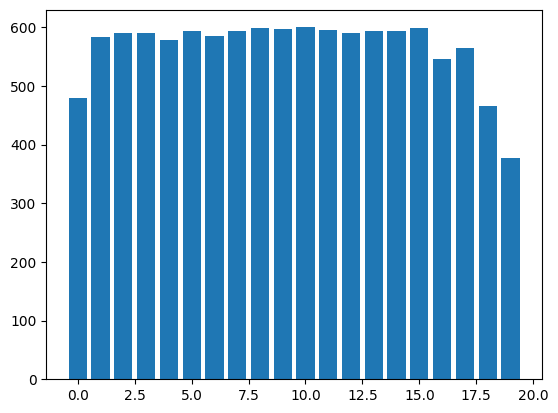

In [113]:
# The Complement Naive Bayes classifier was designed to correct the "severe assumptions" made by the standard Multinomial Naive Bayes classifier. It is particularly suited for imbalanced data sets.

from collections import Counter
import matplotlib.pyplot as plt

counter = Counter(newsgroups_train.target)

plt.bar(counter.keys(), counter.values())

# No se ve un desbalance muy marcado, pero probemos igual ComplementNB

In [ ]:
# Experimento 3: Usar ComplementNB en lugar de MultinomialNB con ConuntVectorizer

clf = ComplementNB(alpha=0.1)

clf.fit(X_train, y_train)
y_pred_count =  clf.predict(X_test_count)
score = f1_score(y_test, y_pred_count, average='macro')

improvement = (score - base_score) / base_score * 100
print(f"F1-score: {score}, Improvement: {improvement:.2f}%")

# """CNB handles discrete feature counts (e.g., word frequencies) very effectively."""
# ComplementNB maneja muy bien los conteos discretos de características (por ejemplo, frecuencias de palabras). 
# Por lo tanto, al usar CountVectorizer que produce conteos de palabras, ComplementNB puede aprovechar mejor esta representación de los datos en comparación con MultinomialNB.


F1-score: 0.699413220405338, Improvement: 38.87%


In [114]:
# Experimento 4: Usar ComplementNB en lugar de MultinomialNB con TF-IDF

clf = ComplementNB(alpha=0.1)
clf.fit(X_train, y_train)
y_pred_complement_nb =  clf.predict(X_test)
score = f1_score(y_test, y_pred_complement_nb, average='macro')

improvement = (score - base_score) / base_score * 100
print(f"F1-score: {score}, Improvement: {improvement:.2f}%")



F1-score: 0.6953652590540836, Improvement: 38.07%


Los experimentos demuestran la sensiblidad del F1 score respecto al valor de alpha de smothing, lo cual podria indicar como buena estrategia hacer un gridsearch para optmizar este hiperparametro. Por otro lado se encontro que usando el multinomialNB con una vectorizacion simple con conteo da el peor resultado de los experimentos, incluso peor que el baseline determinado por el K nearest. Y luego su contraparte que dio el mejor resultado de todos, usar la vectorizacion por simple conteo con el ComplementNB, lo cual dio el mejor resultado casi llegando a 0.7 en el F1 score. Esta combinacion la encontre luego de hacer algunas busquedas en foros donde se observa que: "# """CNB handles discrete feature counts (e.g., word frequencies) very effectively.""", lo cual me llevo a probar esta combinacion.

---
## Punto 4

**4**. Transponer la matriz documento-término. De esa manera se obtiene una matriz
término-documento que puede ser interpretada como una colección de vectorización de palabras.
Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares.

In [ ]:
tfidfvect = TfidfVectorizer()
X_train = tfidfvect.fit_transform(newsgroups_train.data)

In [128]:
# Shape de la matriz documento-término
print("Documento-Termino Shape:",X_train.shape)
print("Cantidad de documentos:", X_train.shape[0])
print("Tamaño del vocabulario (dimensionalidad de los vectores):", X_train.shape[1])

print("Termino-Documento Shape:",X_train.T.shape)
print("Cantidad de terminos:", X_train.T.shape[0])
print("Cantidad de documentos:", X_train.T.shape[1])

print(X_train.T[0].toarray())  # Vector del término 0 en todos los documentos

# La matriz término-documento es la transpuesta de la matriz documento-término. De esa manera se obtiene una matriz
# término-documento que puede ser interpretada como una colección de vectorización de palabras.
# Estudiar ahora similaridad entre palabras tomando 5 palabras y estudiando sus 5 más similares.

words = ['god', 'computer', 'space', 'religion', 'science']
word_indices = [tfidfvect.vocabulary_.get(word) for word in words]
for idx in word_indices:
    print(f"\nPalabra índice {idx} ({idx2word[idx]}):\n")

    # Medir similaridad coseno con todos los términos
    cossim = cosine_similarity(X_train.T[idx], X_train.T)[0]

    # Obtener los 5 términos más similares
    mostsim = np.argsort(cossim)[::-1][1:6]

    print("Las 5 palabras más similares son:\n")
    for i in mostsim:
        print(
            idx2word[i], f"(similaridad: {cossim[i]:.4f})"
        )



Documento-Termino Shape: (11314, 101631)
Cantidad de documentos: 11314
Tamaño del vocabulario (dimensionalidad de los vectores): 101631
Termino-Documento Shape: (101631, 11314)
Cantidad de terminos: 101631
Cantidad de documentos: 11314
[[0. 0. 0. ... 0. 0. 0.]]

Palabra índice 43842 (god):

Las 5 palabras más similares son:

jesus (similaridad: 0.2688)
bible (similaridad: 0.2616)
that (similaridad: 0.2560)
existence (similaridad: 0.2548)
christ (similaridad: 0.2511)

Palabra índice 28940 (computer):

Las 5 palabras más similares son:

decwriter (similaridad: 0.1563)
deluged (similaridad: 0.1522)
harkens (similaridad: 0.1522)
shopper (similaridad: 0.1443)
the (similaridad: 0.1361)

Palabra índice 84097 (space):

Las 5 palabras más similares son:

nasa (similaridad: 0.3304)
seds (similaridad: 0.2966)
shuttle (similaridad: 0.2928)
enfant (similaridad: 0.2803)
seti (similaridad: 0.2465)

Palabra índice 77274 (religion):

Las 5 palabras más similares son:

religious (similaridad: 0.2451)
re